<a href="https://colab.research.google.com/github/maysha29/AIML/blob/main/MayshaTabassum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## mayshatabassum29@gmail.com

## Answer to the Question no.1

In [13]:
import numpy as np
import pandas as pd

FILE = "final-employee-ds.csv"
TRAIN = "TrainingHours"

df = pd.read_csv(FILE, usecols=[TRAIN ])
arr = pd.to_numeric(df[TRAIN ], errors="coerce").dropna().to_numpy(dtype=float)

mean = np.mean(arr)
std = np.std(arr)

print("mean", mean)
print("standard deviation", std)

mean 24.19
standard deviation 13.842467265628624


## Answer to the Question no.2

In [19]:
df = pd.read_csv(FILE)

SALARY = "Salary"
DEPT= "Department"
EXP = "ExperienceYears"
PROJ = "ProjectCount"

df[SALARY] = pd.to_numeric(df[SALARY], errors="coerce")
df[EXP] = pd.to_numeric(df[EXP], errors="coerce")
df[PROJ] = pd.to_numeric(df[PROJ], errors="coerce")

dept_median = df.groupby(DEPT)[SALARY].transform("median")
overall_median = df[SALARY].median()
df[SALARY] = df[SALARY].fillna(dept_median).fillna(overall_median)

mask = (df[EXP] > 12) & (df[PROJ] > 5)
total_salary = df.loc[mask, SALARY].sum()
print("Total salary",total_salary)

Total salary 1985775.5


## Answer to the Question no.3

In [20]:
df = pd.read_csv(FILE)
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["PerformanceScore"] = pd.to_numeric(df["PerformanceScore"], errors="coerce")

mask = (
    df["Department"].isin(["IT", "Finance"]) &
    df["Age"].between(30, 45) &
    (df["PerformanceScore"] > 88)
)

result = (
    df.loc[mask, ["Name", "Department", "Salary", "PerformanceScore"]]
    .dropna(subset=["Salary", "PerformanceScore"])
    .sort_values(by="Salary", ascending=False)

)

if result.empty:
    print("No records found for the given criteria.")
else:
    print(result.to_string(index=False))

       Name Department   Salary  PerformanceScore
Employee_95         IT 140386.0                94
Employee_89    Finance 126027.0                92
 Employee_5    Finance  85543.0                97
Employee_33         IT  83919.0                98
Employee_56    Finance  49540.0                94


## Answer to the Question no.4

In [21]:
df = pd.read_csv(FILE)
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")
df["WorkHoursPerWeek"] = pd.to_numeric(df["WorkHoursPerWeek"], errors="coerce")
df["SalaryPerHour"] = df["Salary"] / (df["WorkHoursPerWeek"] * 4)

TOP_FIVE = df.nlargest(5, "SalaryPerHour")

final_output = TOP_FIVE[["Name", "SalaryPerHour"]].reset_index(drop=True)

print(final_output.to_string(index=False))

       Name  SalaryPerHour
Employee_47     981.278571
Employee_28     971.292857
Employee_32     967.392857
Employee_80     945.335526
Employee_81     937.858974


## Answer to the Question no.5

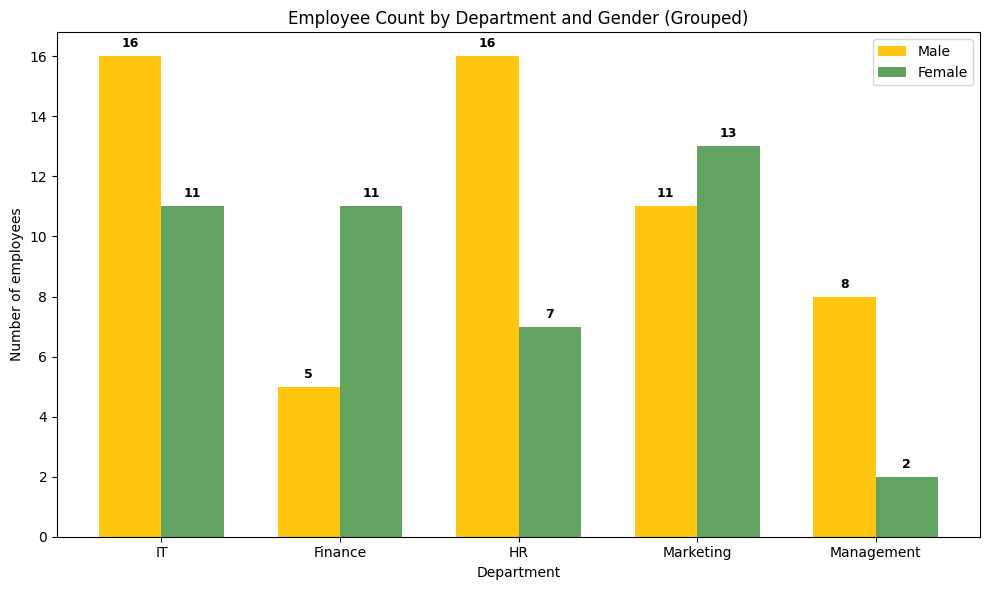

In [22]:
import matplotlib.pyplot as plt

df = pd.read_csv(FILE)
dept_map = {"it":"IT","finance":"Finance","hr":"HR","marketing":"Marketing","management":"Management"}
df["Department"] = df["Department"].astype(str).str.strip().str.lower().map(dept_map).fillna(df["Department"].astype(str).str.strip())
df["Gender"] = df["Gender"].astype(str).str.strip().str.capitalize()

departments = ["IT","Finance","HR","Marketing","Management"]
ct = pd.crosstab(df["Department"], df["Gender"]).reindex(index=departments, columns=["Male","Female"], fill_value=0)
male, female = ct["Male"].to_numpy(dtype=int), ct["Female"].to_numpy(dtype=int)


x = np.arange(len(departments)); w = 0.35
male_color, female_color = "#FFC50F", "#63A361"
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x-w/2, male, w, label="Male", color=male_color)
ax.bar(x+w/2, female, w, label="Female", color=female_color)
ax.set_xticks(x); ax.set_xticklabels(departments)
ax.set_xlabel("Department"); ax.set_ylabel("Number of employees")
ax.set_title("Employee Count by Department and Gender (Grouped)"); ax.legend()


for i,(m,f) in enumerate(zip(male,female)):
    if m: ax.text(i-w/2, m+0.2, str(m), ha="center", va="bottom", fontsize=9, fontweight="bold")
    if f: ax.text(i+w/2, f+0.2, str(f), ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.savefig("department_gender_grouped_bar.png", dpi=150)
plt.show()